<center>
    <h1> Programación Científica</h1>
    <h2> Actividad 2 </h2>
    <h2> Felipe Chacón Ossa </h2>
    <h2> 201303017-3 </h2>
</center>

_11 Abril 2017_

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def image_plot(data, title='FITS image'):
    plt.figure(figsize=(10,10))
    im = plt.imshow(data, cmap=plt.cm.afmhot, interpolation=None)
    plt.title(title)
    #plt.axis('off')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

In [97]:
# first we load the data:
data = np.load("orion.npy")

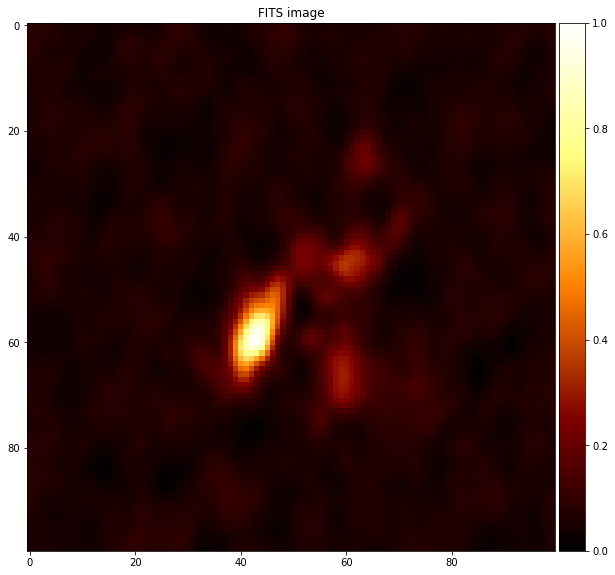

In [98]:
image_plot(data)

### Paso 1) 

Calcular el `RMS` de la imagen entregada. 

$$RMS = \sqrt{\frac{1}{m\ n} \sum_{i=1}^m \sum_{j=1}^n \texttt{data[i,j]}^2}$$

__Nota:__ Computarlo de forma vectorizada.

In [99]:
rms = np.sqrt(np.sum(data*data)/data.size)

### Paso 2) 

Genere otro arreglo donde los pixeles con intensidades por debajo del `RMS` son considerados como _no usables_ (con valor `=0`).  Mostrar tal imagen resultante.

In [100]:
mask = data > rms
newData = data*mask

### Paso 3)

Crear la función
```python
def apply_filter(data, mask, kernel_filter):
    ...
    return None
```
Que reciba el arreglo de datos completo `data`, el arreglo booleano con los __pixeles usables__ `mask` (sobre el RMS), y kernel de filtro de `3x3`. La función debe convolucionar `filter` sobre la imagen `data`, sólo en los pixeles usables. La función no debe retornar nada, pero debe modificar `data` de forma _in place_ (sin generar copias de el mismo).

Finalmente mostrar el resultado de convolucionar tal filtro en `data` (mostrar imágen).

__Nota:__ Debe usar siempre que pueda _instrucciones vectorizadas_ y operaciones _inplace_.

__Image convolution:__ https://en.wikipedia.org/wiki/Kernel_(image_processing)#Convolution

In [101]:
def apply_filter(data, mask, kernel_filter):
    
    for i in range(1,100):
        for j in range(1,100):
            if(~mask[i,j]):
                continue
            aux = data[i-1:i+2,j-1:j+2]
            data[i,j] = np.sum(aux*kernel_filter)
        
    return None

# Gaussian blur filter: Ocupar este filtro!
kernel_filter = 1./16.*np.array([[1,2,1], [2,4,2], [1,2,1]])

In [105]:
apply_filter(newData, mask, kernel_filter)

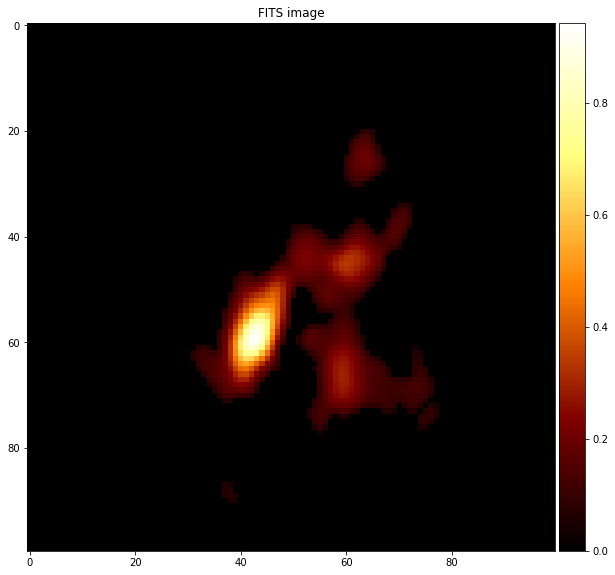

In [103]:
image_plot(newData)